In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import 

In [2]:
def inputf(func, left_border, right_border, dots_count):
    x, y = [], []
    for i in range(dots_count):
        x.append(left_border + (right_border - left_border) * i / (dots_count - 1))
        y.append(func(x[i]))
    return x, y, func

### Метод прогонки

In [3]:
def sweep_method(A, b):
    A = A.copy()
    b = b.copy()
    n = len(A)

    if len(A) > 1:
        A[0][1] /= A[0][0]
    for i in range(1, n - 1):
        A[i][i + 1] /= -(A[i][i] + A[i][i - 1] * A[i - 1][i])

    b[0] /= A[0][0]
    for i in range(1, n):
        b[i] = (b[i] - A[i][i - 1] * b[i - 1]) / (A[i][i] + A[i][i - 1] * A[i - 1][i])

    x = np.zeros(n)
    x[n - 1] = b[n - 1]
    for i in range(n - 2, -1, -1):
        x[i] = b[i] + A[i][i + 1] * x[i + 1]
    return x

### Нахождение кубического сплайна

In [4]:
def syst_spline(x, y):
    n = len(x) - 1
    h = []
    for i in range(0, n):
        h += [x[i + 1] - x[i]]

    A = np.zeros((n - 1, n - 1))

    for i in range(0, n - 2):
        A[i + 1][i] = h[i]
        A[i][i + 1] = h[i]

    for i in range(0, n - 1):
        A[i][i] = 2 * (h[i] + h[i + 1])

    F = []
    for i in range(1, n):
        F += [3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])]

    c = sweep_method(A, F)
    c = [0.0] + list(c) + [0.0]
    return c, h

In [ ]:
def syst_spline2(x, y):
    n = len(x) - 1
    h = []
    for i in range(0, n):
        h += [x[i + 1] - x[i]]

    A = np.zeros((n - 1, n - 1))

    for i in range(0, n - 2):
        A[i + 1][i] = h[i]
        A[i][i + 1] = h[i]

    for i in range(0, n - 1):
        A[i][i] = 2 * (h[i] + h[i + 1])

    F = []
    for i in range(1, n):
        F += [3 * ((y[i + 1] - y[i]) / h[i] - (y[i] - y[i - 1]) / h[i - 1])]

    c = sweep_method(A, F)
    c = [0.0] + list(c) + [0.0]
    return c, h

### Получение значений

In [13]:
def evaluate(xdot, x, y, h, c):
    for i in range(1, len(x)):
        if x[i - 1] <= xdot <= x[i]:
            val = 0
            val += y[i]
            b = (y[i] - y[i - 1]) / h[i - 1] + (2 * c[i] + c[i - 1]) * h[i - 1] / 3
            val += b * (xdot - x[i])
            val += c[i] * ((xdot - x[i]) ** 2)
            d = (c[i] - c[i - 1]) / (3 * h[i - 1])
            val += d * ((xdot - x[i]) ** 3)
            return val
    return None


def output(x, y, h, c):
    for i in range(1, len(x)):
        b = (y[i] - y[i - 1]) / h[i - 1] + (2 * c[i] + c[i - 1]) * h[i - 1] / 3
        d = (c[i] - c[i - 1]) / (3 * h[i - 1])
        print(f"Промежуток {x[i - 1]} --- {x[i]}",)
        print(np.poly1d([d, c[i], b, y[i]]))
    return evaluate, output

In [17]:
def test(func, xdot, left_border, right_border, dots_count):
    """

    :param func: function
    :param xdot: value in this dot
    :param left_border: left border
    :param right_border: right border
    :param dots_count: number of dots
    :return:
    """
    x, y, f = inputf(func, left_border, right_border, dots_count)

    plt.plot(x, y, 'om')
    x_plot = np.linspace(min(x), max(x), 100)
    y_plot = [f(xdot) for xdot in x_plot]
    plt.plot(x_plot, y_plot)

    spline_koef, h = syst_spline(x, y)
    y_plot = [evaluate(xdot, x, y, h, spline_koef) for xdot in x_plot]
    plt.plot(x_plot, y_plot)

    output(x, y, h, spline_koef)

    print(f"Считаеем значение в точке {xdot}...")
    print(f"f({xdot}) =", f(xdot))
    print(f"Кубический сплайн в точке {xdot} =", evaluate(xdot, x, y, h, spline_koef))
    print(f"Разница значений =", abs(f(xdot) - evaluate(xdot, x, y, h, spline_koef)))

    plt.show()

In [18]:
def main():
    test(np.sqrt, 2, 0, 4, 6)

Промежуток 0.0 --- 0.8
         3          2
-0.2491 x - 0.5979 x + 0.7992 x + 0.8944
Промежуток 0.8 --- 1.6
       3           2
0.276 x + 0.06447 x + 0.3381 x + 1.265
Промежуток 1.6 --- 2.4
          3           2
-0.05355 x - 0.06406 x + 0.3384 x + 1.549
Промежуток 2.4 --- 3.2
         3          2
0.01944 x - 0.0174 x + 0.2732 x + 1.789
Промежуток 3.2 --- 4.0
          3
0.007251 x + 0.2593 x + 2
Считаеем значение в точке 2...
f(2) = 1.4142135623730951
Кубический сплайн в точке 2 = 1.4070194041806625
Разница значений = 0.0071941581924326314


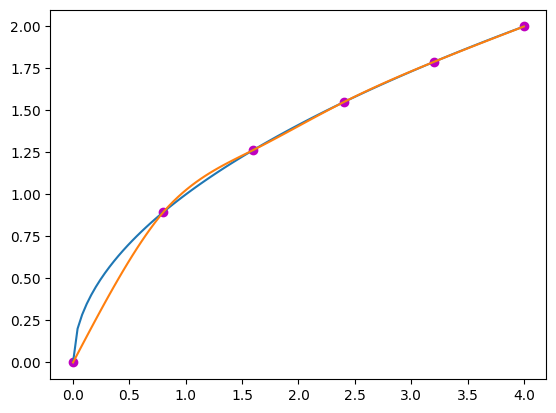

In [19]:
main()

Промежуток 1.0 --- 3.5
         3          2
0.04162 x + 0.3121 x + 2.739 x + 6.548
Промежуток 3.5 --- 6.0
          3
-0.04162 x + 3.52 x + 14.7
Считаеем значение в точке 3.7...
f(3.7) = 7.117092102818399
Кубический сплайн в точке 3.7 = 7.107930480003532
Разница значений = 0.009161622814866988


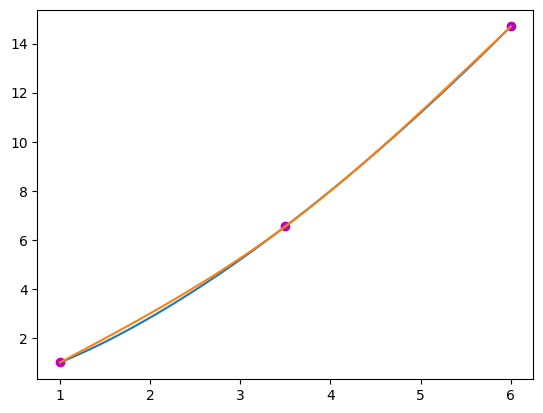

In [20]:
test(lambda x: x*np.sqrt(x), 3.7, 1, 6, 3)

Промежуток 1.0 --- 1.625
        3          2
0.2635 x + 0.4942 x + 1.92 x + 2.071
Промежуток 1.625 --- 2.25
         3          2
-0.1598 x + 0.1945 x + 2.27 x + 3.375
Промежуток 2.25 --- 2.875
         3          2
0.02175 x + 0.2353 x + 2.538 x + 4.875
Промежуток 2.875 --- 3.5
          3          2
-0.02128 x + 0.1954 x + 2.807 x + 6.548
Промежуток 3.5 --- 4.125
           3          2
-0.003736 x + 0.1884 x + 3.047 x + 8.378
Промежуток 4.125 --- 4.75
         3          2
-0.0148 x + 0.1606 x + 3.265 x + 10.35
Промежуток 4.75 --- 5.375
         3          2
0.02243 x + 0.2027 x + 3.492 x + 12.46
Промежуток 5.375 --- 6.0
         3
-0.1081 x + 3.619 x + 14.7
Считаеем значение в точке 3.7...
f(3.7) = 7.117092102818399
Кубический сплайн в точке 3.7 = 7.117160875828543
Разница значений = 6.877301014451831e-05


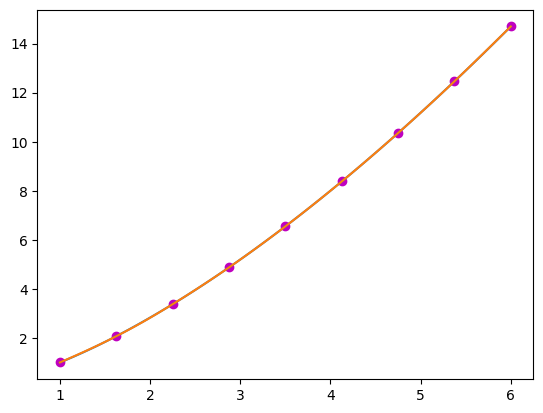

In [22]:
test(lambda x: x*np.sqrt(x), 3.7, 1, 6, 9)

Промежуток -2.0 --- -1.0
        3          2
0.1909 x + 0.5726 x + 0.4496 x - 0.8415
Промежуток -1.0 --- 0.0
        3           2
-0.201 x - 0.03037 x + 1.012 x
Промежуток 0.0 --- 1.0
         3          2
-0.1403 x - 0.4512 x + 0.5306 x + 0.8415
Промежуток 1.0 --- 2.0
          3          2
-0.01156 x - 0.4859 x - 0.4065 x + 0.9093
Промежуток 2.0 --- 3.0
        3          2
0.1242 x - 0.1134 x - 1.006 x + 0.1411
Промежуток 3.0 --- 4.0
        3          2
0.2212 x + 0.5502 x - 0.5689 x - 0.7568
Промежуток 4.0 --- 5.0
         3
-0.1834 x - 0.01872 x - 0.9589
Считаеем значение в точке 4.1...
f(4.1) = -0.8182771110644104
Кубический сплайн в точке 4.1 = -0.8083760109167277
Разница значений = 0.00990110014768264


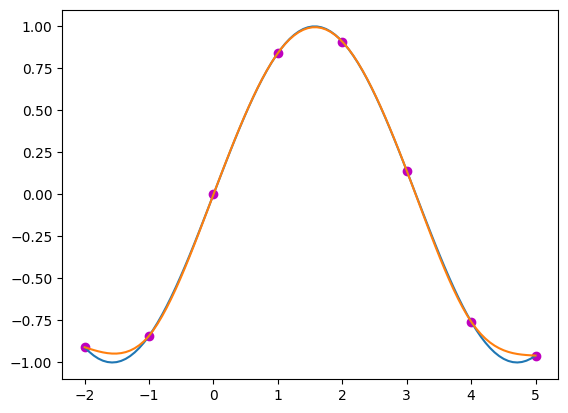

In [26]:
test(np.sin, 4.1, -2, 5, 8)

Промежуток -2.0 --- -1.0
        3          2
0.1909 x + 0.5726 x + 0.4496 x - 0.8415
Промежуток -1.0 --- 0.0
        3           2
-0.201 x - 0.03037 x + 1.012 x
Промежуток 0.0 --- 1.0
         3          2
-0.1403 x - 0.4512 x + 0.5306 x + 0.8415
Промежуток 1.0 --- 2.0
          3          2
-0.01156 x - 0.4859 x - 0.4065 x + 0.9093
Промежуток 2.0 --- 3.0
        3          2
0.1242 x - 0.1134 x - 1.006 x + 0.1411
Промежуток 3.0 --- 4.0
        3          2
0.2212 x + 0.5502 x - 0.5689 x - 0.7568
Промежуток 4.0 --- 5.0
         3
-0.1834 x - 0.01872 x - 0.9589
Считаеем значение в точке 1...
f(1) = 0.8414709848078965
Кубический сплайн в точке 1 = 0.8414709848078965
Разница значений = 0.0


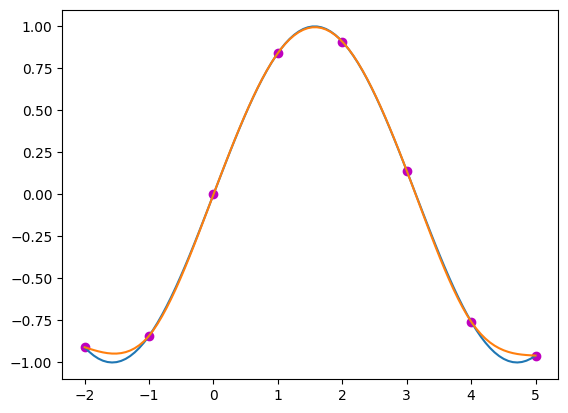

In [27]:
test(np.sin, 1, -2,5, 8)

In [32]:
import numpy as np
from scipy.interpolate import splrep
import matplotlib.pyplot as plt
x = [0, 1, 2, 3, 4, 5]
print(x)
y = x
cs = CubicSpline(x, y, )
xs = np.arange(-0.5, 5, 0.1)
print(cs)
plt.figure(figsize=(6.5, 4))
plt.plot(x, y, 'o', label='data')
plt.plot(xs, np.sin(xs), label='true')
plt.plot(xs, cs(xs), label="S")
plt.xlim(-0.5, 5)
splrep()
plt.legend(loc='lower left', ncol=2)
plt.show()

[0, 1, 2, 3, 4, 5]


ValueError: `bc_type` must contain 2 elements to specify start and end conditions.